<a id='1'></a>
# 1 | Overview of Working Technology

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


<a id=toc></a>
<h1 style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;background-position: 0px 0px;
"><span style='color:white'><b> Ecoder Decoder Architecture with Attention </b></span></h1>

![Encoder](https://www.researchgate.net/publication/377750342/figure/fig2/AS:11431281220369226@1706414219715/RNN-encoder-decoder-with-an-Attention-mechanism.png)

### Encoder-Decoder Architecture in RNNs:
- **Architecture**:
  - Comprises two RNNs: an Encoder and a Decoder.
  - Encoder processes the input sequence and converts it into a fixed-size context vector.
  - Decoder takes this context vector and generates the output sequence step by step.

- **Encoder**:
  - Takes input sequence one token at a time.
  - Outputs a context vector summarizing the input sequence.
  - Can use various RNN variants like LSTM or GRU.

- **Decoder**:
  - Takes the context vector from the Encoder and generates the output sequence.
  - Processes the output sequence step by step, incorporating information from the context vector.
  - Can have a different architecture from the Encoder, but typically uses the same RNN variant.

- **Training**:
  - During training, both Encoder and Decoder are jointly trained using teacher forcing.
  - Teacher forcing involves providing the correct previous target token as input to the Decoder at each step.


<a id='2'></a>
# 2 | Importing Required Libraries & DataSource

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 9.2 MB/s eta 0:00:00


In [ ]:
pip install pydot

In [ ]:
from textblob import Word
import nltk
nltk.data.path.append("/kaggle/working/")
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Libraray for Data Manipulation
import numpy as np
import pandas as pd

# Libraray for Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library for preprocessing
import contractions
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import spacy
import math
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import Parallel, delayed
import re,string,unicodedata
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from scipy.sparse import lil_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk import pos_tag

# Library for model building
from tensorflow.keras.regularizers import l2
import tensorflow
import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential,Model
#from attention import BahdanauAttention
from keras.layers import SimpleRNN,LSTM,GRU, Embedding, Dense, SpatialDropout1D, Dropout, BatchNormalization, Bidirectional, Attention, Input, Concatenate
from sklearn.metrics import accuracy_score
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers import Adam

#Library to overcome Warnings
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



<a id='1.1'></a>
# Load and Inspect Dataset

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


In [ ]:
train_df = pd.read_csv('samsum-train.csv')
test_df = pd.read_csv('samsum-test.csv')

In [ ]:
train_df.sample(5)

,id,dialogue,summary
8352,13810650,Henry: where RU?\r\nHenry: I keep waiting like...,Rosie got stuck in the traffic. Henry is waiti...
2639,13829639,Cierra: <file_photo>\r\nTucker: already? \r\nT...,Cierra picked it up from the parcel shop today...
3139,13682527,"Martin: Hi, can you help me?\r\nLily: Hi, of c...",Martin is going to buy Kathy Coldplay's CD and...
13862,13729806,Nicole: thanks for all the gifts you've been s...,Patrick sent Nicole a lot of gifts to apologiz...
1804,13731084,Isla: Do you remeber where we parked last nigh...,Isla was exhausted so she forgot she parked in...


In [ ]:
test_df.sample(5)

,id,dialogue,summary
810,13715861,"Luke: Ryanair to cancel flights affecting 400,...",Ryanair has canceled many flights. This affect...
289,13815437,Caroline: I think his mother doesn't like me.....,Kate believes her boyfriend's mother dislikes ...
797,13731338,"Ralph: Hey brewski, did you hear that decent p...",Ralph told Andrew a joke.
773,13829066,Rachel: So what time we’re going to the museum...,Rachel and Wai will go to the museum together....
614,13731424,"Anthony: Hi Rob, wanna grab a beer?\r\nRobert:...",Anthony can't meet up with Robert at 9 as he h...





<a id='3'></a>
# 3 | Data Exploration

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


<a id='3.1'></a>
#### 3.1. Computing Dimension of Dataset

In [ ]:
print("train_df shape: ",train_df.shape)
print("test_df shape: ",test_df.shape)

train_df shape:  (14732, 3)
test_df shape:  (819, 3)


<a id='3.2'></a>
#### 3.2. Statistical Summary of Dataset

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14732 entries, 0 to 14731
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        14732 non-null  object
 1   dialogue  14731 non-null  object
 2   summary   14732 non-null  object
dtypes: object(3)
memory usage: 345.4+ KB


<a id='3.3'></a>
#### 3.3. Checking if There's Any Duplicate Records.

In [ ]:
print("Duplicates in Dataset: ",train_df.duplicated().sum())

Duplicates in Dataset:  0


<a id='3.4'></a>
#### 3.4. Computing Total No. of Missing Values and the Percentage of Missing Values

In [ ]:
missing_data = train_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(train_df))*100,2)
missing_data

<a id='3.5'></a>
#### 3.5. Performing Descriptive Analysis

In [ ]:
round(train_df.describe().T,2)


<a id='4'></a>
# 4 | Preprocessing

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


<a id='4.1'></a>
### **1. Dropping unwanted column**

In [ ]:
col = 'id'
train_df.drop(col,axis = 1,inplace = True)
test_df.drop(col,axis = 1,inplace = True)

<a id='4.2'></a>
### **2. Dropping Duplicates and Null Values**

In [ ]:
train_df.dropna(inplace = True)

<a id='4.3'></a>
### **3. Lowercasing**

In [ ]:
train_df['dialogue'] = train_df['dialogue'].str.lower()
train_df['summary'] = train_df['summary'].str.lower()
test_df['dialogue'] = test_df['dialogue'].str.lower()
test_df['summary'] = test_df['summary'].str.lower()

<a id='4.4'></a>
### **4. Removing Html tags**

In [ ]:
import re
def remove_html_tags(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text


In [ ]:
train_df['dialogue'] = train_df['dialogue'].apply(remove_html_tags)
train_df['summary'] = train_df['summary'].apply(remove_html_tags)
test_df['dialogue'] = test_df['dialogue'].apply(remove_html_tags)
test_df['summary'] = test_df['summary'].apply(remove_html_tags)

<a id='4.5'></a>
### **5.  Removing URLs**

In [ ]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

train_df['dialogue'] = train_df['dialogue'].apply(remove_url)
train_df['summary'] = train_df['summary'].apply(remove_url)
test_df['dialogue'] = test_df['dialogue'].apply(remove_url)
test_df['summary'] = test_df['summary'].apply(remove_url)

<a id='4.6'></a>
### **6. Chat word treatment**

In [ ]:
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laughter",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "LOL": "Laughing out loud",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don’t care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "IDC": "I don’t care",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "LMAO": "Laughing my a** off",
    "BFF": "Best friends forever",
    "CSL": "Can’t stop laughing",
}

In [ ]:
def chat_conversion(text):
    new_text=[]
    for w in text.split():
        if w.upper() in chat_words:
            new_text.append(chat_words[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [ ]:
train_df['dialogue'] = train_df['dialogue'].apply(chat_conversion)
train_df['summary'] = train_df['summary'].apply(chat_conversion)
test_df['dialogue'] = test_df['dialogue'].apply(chat_conversion)
test_df['summary'] = test_df['summary'].apply(chat_conversion)

<a id='4.7'></a>
### **7. Removing Emojis**

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
train_df['dialogue'] = train_df['dialogue'].apply(remove_emoji)
train_df['summary'] = train_df['summary'].apply(remove_emoji)
test_df['dialogue'] = test_df['dialogue'].apply(remove_emoji)
test_df['summary'] = test_df['summary'].apply(remove_emoji)

<a id='4.8'></a>
### **8. Removing contraction**

In [ ]:
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

train_df['dialogue'] = train_df['dialogue'].apply(expand_contractions)
train_df['summary'] = train_df['summary'].apply(expand_contractions)
test_df['dialogue'] = test_df['dialogue'].apply(expand_contractions)
test_df['summary'] = test_df['summary'].apply(expand_contractions)

In [ ]:
train_df['summary'] = ['<start> ' + sentence + ' <end>' for sentence in train_df['summary']]
test_df['summary'] = ['<start> ' + sentence + ' <end>' for sentence in test_df['summary']]

<a id='4.9'></a>
### **9. Tokenize on the Data**

In [ ]:
tok = Tokenizer()
tok.fit_on_texts(train_df['dialogue']+train_df['summary'])

In [ ]:
len(tok.word_index)

33259

In [ ]:
tok.document_count

14731

#### **Converting data in numerical forms**

In [ ]:
# Convert training dialogues and summaries to sequences
train_df['dialogue'] = tok.texts_to_sequences(train_df['dialogue'])
train_df['summary'] = tok.texts_to_sequences(train_df['summary'])

# Convert test dialogues and summaries to sequences (without fitting)
test_df['dialogue'] = tok.texts_to_sequences(test_df['dialogue'])
test_df['summary'] = tok.texts_to_sequences(test_df['summary'])

In [ ]:
train_df

,dialogue,summary
0,"[423, 1, 3359, 1528, 15, 2, 71, 52, 584, 70, 4...","[16, 423, 3359, 1528, 6, 12, 211, 584, 52, 98,..."
1,"[318, 144, 18, 2, 5396, 11, 10, 39, 2944, 604,...","[16, 318, 6, 1588, 18, 5396, 11, 11934, 10, 39..."
2,"[225, 116, 26, 7, 60, 356, 217, 1440, 3, 24, 8...","[16, 356, 235, 174, 4, 16211, 13671, 1959, 118..."
3,"[1001, 410, 1, 61, 1, 21, 10, 21537, 29, 831, ...","[16, 1001, 556, 38, 7, 10, 132, 29, 831, 410, ..."
4,"[192, 113, 9658, 491, 167, 109, 192, 1, 15, 8,...","[16, 192, 7, 2350, 110, 38, 9658, 491, 2300, 3..."
...,...,...
14727,"[4686, 2, 18, 25, 20, 141, 2, 235, 32, 845, 13...","[16, 4686, 7, 512, 3, 64, 1386, 3, 1281, 76, 3..."
14728,"[1076, 137, 1076, 137, 1076, 113, 882, 50, 18,...","[16, 1076, 7, 27, 96, 33, 765, 323, 341, 6, 32..."
14729,"[112, 432, 146, 52, 217, 527, 2850, 12, 5972, ...","[16, 2850, 7, 46, 3, 5972, 8896, 177, 1983, 6,..."
14730,"[597, 631, 2969, 50, 18, 2, 214, 597, 4, 656, ...","[16, 2969, 101, 8, 129, 9, 3, 4, 656, 29, 4, 3..."


In [ ]:
def calculate_max_sequence_length(train_summary,train_dialogue,test_summary,test_dialogue):
    max_length_1 = max(max(len(seq) for seq in train_dialogue), max(len(seq) for seq in train_summary))
    max_length_2 = max(max(len(seq) for seq in test_dialogue), max(len(seq) for seq in test_summary))
    max_length_combined = max(max_length_1,max_length_2)
    return max_length_combined

max_length_combined = calculate_max_sequence_length(train_df['dialogue'],train_df['summary'],test_df['dialogue'],test_df['summary'])
max_length_combined

819

In [ ]:
for num in train_df['dialogue'][0]:
    print(num, end=' ')

423 1 3359 1528 15 2 71 52 584 70 423 54 211 2 98 

In [ ]:
# Print corresponding words horizontally
for num in train_df['dialogue'][0]:
    word = tok.index_word.get(num, 'UNK')
    print(word, end=' ')

amanda i baked cookies do you want some jerry sure amanda ill bring you tomorrow 

In [ ]:
for num in train_df['summary'][0]:
    word = tok.index_word.get(num)
    print(word,end = " ")

start amanda baked cookies and will bring jerry some tomorrow end 

<a id='4.10'></a>
### **10. separating the data in dependent and independent and padding it**

In [ ]:
x_train = pad_sequences(train_df['dialogue'],maxlen = max_length_combined,padding = 'post')
y_train = pad_sequences(train_df['summary'],maxlen = max_length_combined,padding = 'post')
x_test = pad_sequences(test_df['dialogue'],maxlen = max_length_combined,padding = 'post')
y_test = pad_sequences(test_df['summary'],maxlen = max_length_combined,padding = 'post')

In [ ]:
x_train

array([[ 423,    1, 3359, ...,    0,    0,    0],
       [ 318,  144,   18, ...,    0,    0,    0],
       [ 225,  116,   26, ...,    0,    0,    0],
       ...,
       [ 112,  432,  146, ...,    0,    0,    0],
       [ 597,  631, 2969, ...,    0,    0,    0],
       [1586,   18,    2, ...,    0,    0,    0]], dtype=int32)

In [ ]:
y_train

array([[  16,  423, 3359, ...,    0,    0,    0],
       [  16,  318,    6, ...,    0,    0,    0],
       [  16,  356,  235, ...,    0,    0,    0],
       ...,
       [  16, 2850,    7, ...,    0,    0,    0],
       [  16, 2969,  101, ...,    0,    0,    0],
       [  16, 1586,    6, ...,    0,    0,    0]], dtype=int32)

In [ ]:
# Check the shape of the resulting arrays
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (14731, 819)
Shape of x_test: (819, 819)
Shape of y_train: (14731, 819)
Shape of y_test: (819, 819)




<a id='5'></a>
# 5 | Modelling

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


<a id='5.1'></a>
### **5.1. ENCODER-DECODER MODEL WITH ATTENTION**

In [ ]:
max_length_input = x_train.shape[1]
max_length_output = y_train.shape[1]
input_vocab_size = len(tok.word_index) + 1
output_vocab_size = len(tok.word_index) + 1

# Define Encoder model
encoder_inputs = Input(shape=(max_length_input,))
encoder_embedding = Embedding(input_dim=input_vocab_size, output_dim=260)(encoder_inputs)
encoder_lstm = LSTM(64, return_sequences=True, return_state=True)  # Ensure return_sequences=True
encoder_lstm = LSTM(64, return_sequences=True, return_state=True)  # Ensure return_sequences=True
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Define Decoder model
decoder_inputs = Input(shape=(max_length_output,))
decoder_embedding = Embedding(input_dim=output_vocab_size, output_dim=260)(decoder_inputs)
decoder_lstm = LSTM(64, return_sequences=True, return_state=True)
decoder_lstm = LSTM(64, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)

# Attention Layer
attention = Attention()([decoder_outputs, encoder_outputs])

# Concatenate attention output with decoder outputs
decoder_concat_input = Concatenate(axis=-1)([decoder_outputs, attention])

# Dense Layer for output prediction
decoder_dense = Dense(output_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the full Encoder-Decoder model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 819)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 819)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 819, 260)       │      8,647,600 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 819, 260)       │      8,647,600 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, 819, 64),      │         83,200 │ embedding[0][0]        │
│                           │ (None, 64), (None,     │                │                        │
│                           │ 64)]                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_3 (LSTM)             │ [(None, 819, 64),      │         83,200 │ embedding_1[0][0],     │
│                           │ (None, 64), (None,     │                │ lstm_1[0][1],          │
│                           │ 64)]                   │                │ lstm_1[0][2]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention (Attention)     │ (None, 819, 64)        │              0 │ lstm_3[0][0],          │
│                           │                        │                │ lstm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 819, 128)       │              0 │ lstm_3[0][0],          │
│                           │                        │                │ attention[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 819, 33260)     │      4,290,540 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 21,752,140 (82.98 MB)

 Trainable params: 21,752,140 (82.98 MB)

 Non-trainable params: 0 (0.00 B)

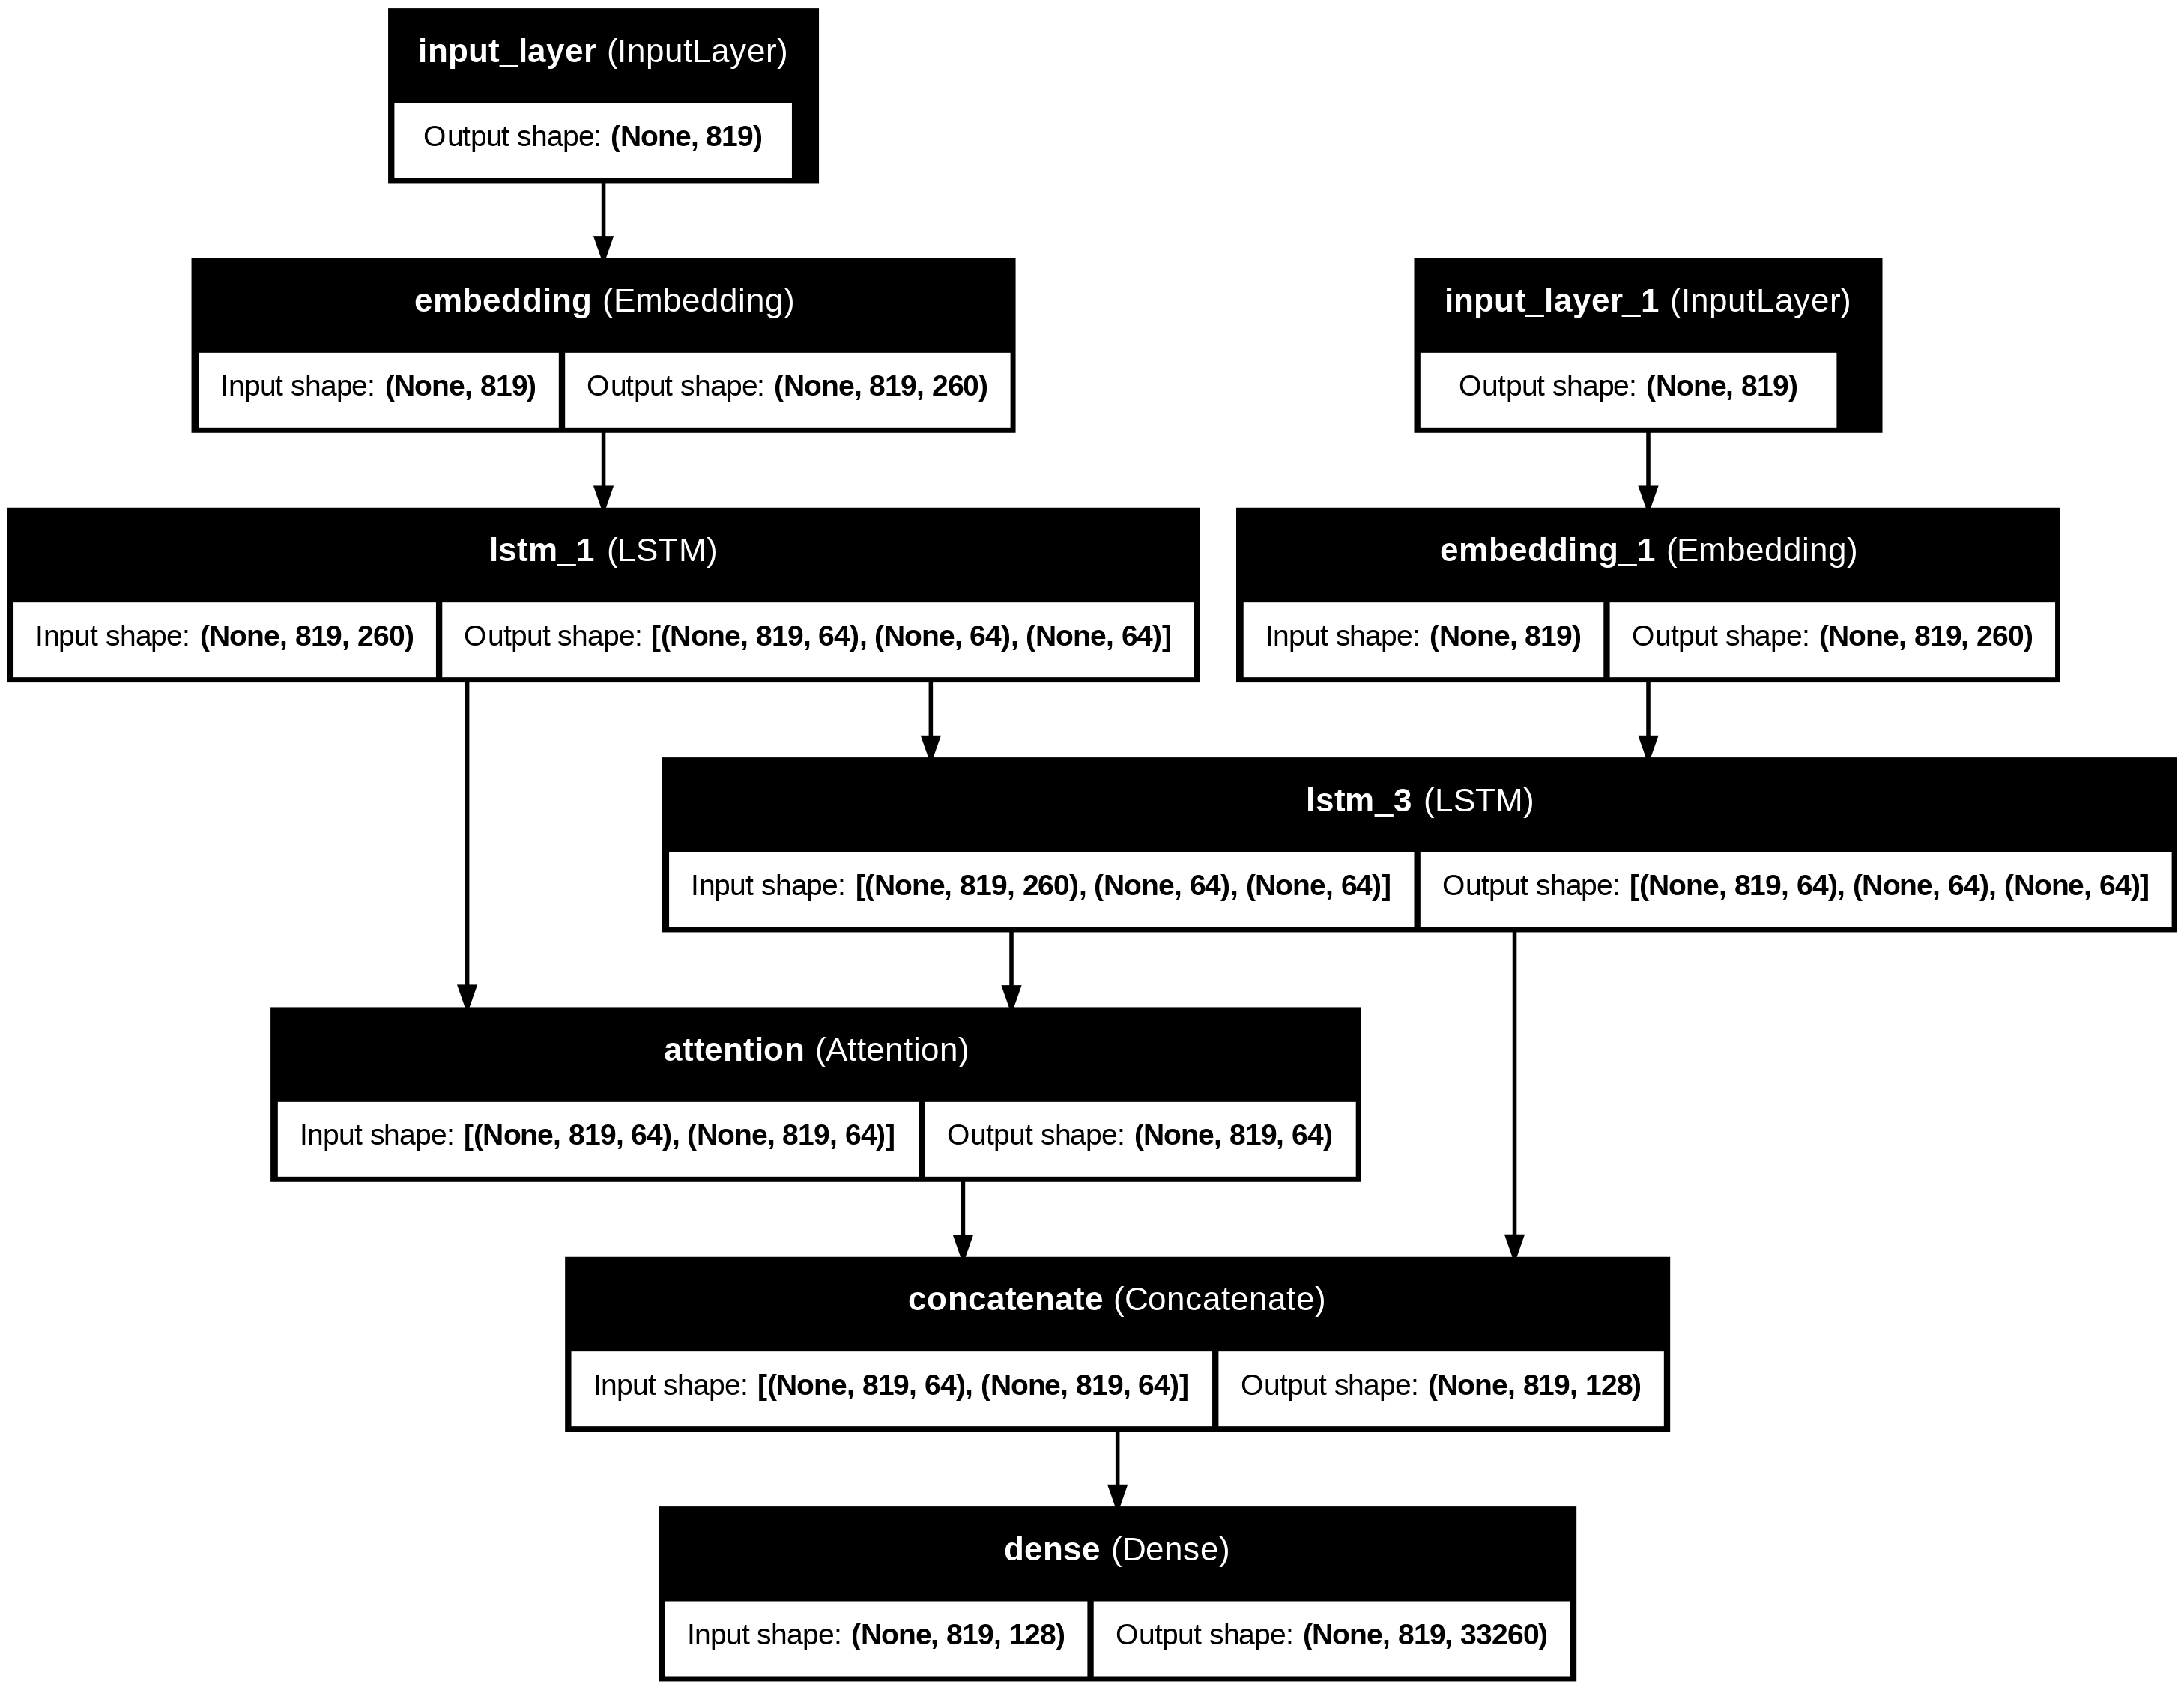

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image('model_plot.png')


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True)  # Updated filepath

# Train the model with callbacks
history = model.fit(
    x=[x_train, y_train],
    y=y_train,
    batch_size=16,
    epochs=5,
    validation_data=([x_test, y_test], y_test),
    callbacks=[early_stopping, model_checkpoint],
)

Epoch 1/5
921/921 ━━━━━━━━━━━━━━━━━━━━ 332s 351ms/step - accuracy: 0.9676 - loss: 1.2737 - val_accuracy: 0.9856 - val_loss: 0.1144
Epoch 2/5
921/921 ━━━━━━━━━━━━━━━━━━━━ 384s 360ms/step - accuracy: 0.9869 - loss: 0.1075 - val_accuracy: 0.9911 - val_loss: 0.0750
Epoch 3/5
921/921 ━━━━━━━━━━━━━━━━━━━━ 382s 360ms/step - accuracy: 0.9913 - loss: 0.0732 - val_accuracy: 0.9938 - val_loss: 0.0531
Epoch 4/5
921/921 ━━━━━━━━━━━━━━━━━━━━ 381s 359ms/step - accuracy: 0.9939 - loss: 0.0532 - val_accuracy: 0.9954 - val_loss: 0.0404
Epoch 5/5
921/921 ━━━━━━━━━━━━━━━━━━━━ 332s 361ms/step - accuracy: 0.9953 - loss: 0.0410 - val_accuracy: 0.9964 - val_loss: 0.0324


<a id='5.2'></a>
### **5.2. ENCODER-DECODER MODEL WITH ATTENTION EVALUATION**

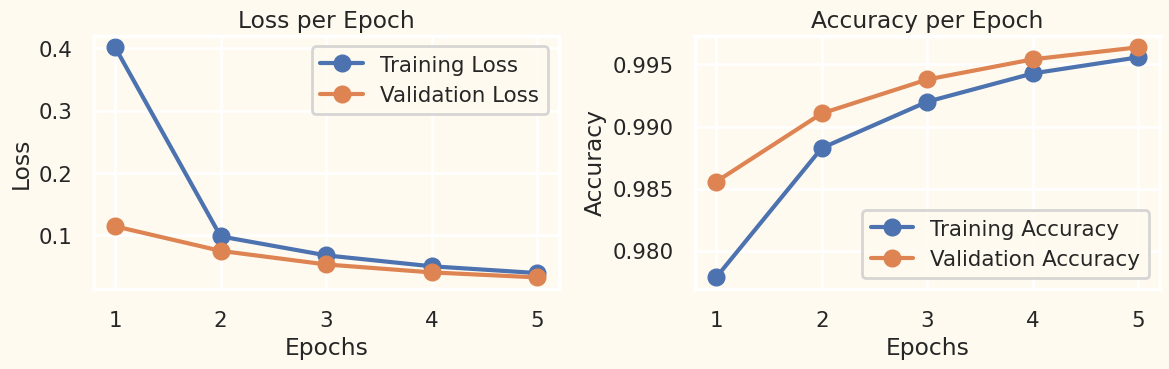

In [ ]:
epochs_range = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['loss'], label='Training Loss', marker='o')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs_range)
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs_range)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from nltk.translate.bleu_score import corpus_bleu

# Reverse token dictionary for summary (assuming you have a tokenizer `tok` for summary)
rev_tok_summary = {idx: word for word, idx in tok.word_index.items()}
rev_tok_dialogue = {idx: word for word, idx in tok.word_index.items()}  # If the dialogue uses the same tokenizer

# Define the batch size
batch_size = 10

# Initialize lists to store predictions and references
predicted_summaries = []
references = []

# Predict on x_test data in batches
for start in range(0, len(x_test), batch_size):
    end = min(start + batch_size, len(x_test))
    x_batch = x_test[start:end]
    y_batch = y_test[start:end]  # Use the corresponding y_test for padding purposes

    # Predict on the batch
    predictions = model.predict([x_batch, y_batch], batch_size=batch_size)

    # Convert predicted tokens to sentences (predicted summaries)
    predicted_tokens_np = np.argmax(predictions, axis=-1)

    for sample in predicted_tokens_np:
        # Convert the predicted tokens into the corresponding words for the summary
        predicted_sentence = ' '.join([rev_tok_summary.get(token, '<unknown>') for token in sample if token != 0 and token not in [tok.word_index.get('start'), tok.word_index.get('end')]])
        predicted_summaries.append(predicted_sentence)

    # Extract the true (actual) summaries for the BLEU score references
    for i in range(len(y_batch)):
        true_summary_sentence = ' '.join([rev_tok_summary.get(token, '<unknown>') for token in y_batch[i] if token != 0 and token not in [tok.word_index.get('start'), tok.word_index.get('end')]])
        references.append([true_summary_sentence.split()])  # BLEU expects list of references for each hypothesis

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━

In [ ]:
# Evaluate BLEU score for the predicted summaries
bleu_score = corpus_bleu(references, [pred.split() for pred in predicted_summaries])
print(f'BLEU score: {bleu_score:.4f}')

BLEU score: 0.6849


<a id='5.3'></a>
### **5.3. PREDICTION FROM ENCODER-DECODER MODEL WITH ATTENTION**

In [ ]:
import numpy as np
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Reverse token dictionaries
rev_tok = {idx: word for word, idx in tok.word_index.items()}

# Select a subset of test data
num_samples = 5
x_test_subset = x_test[:num_samples]
y_test_padded_subset = y_test[:num_samples]

# Predict
predictions = model.predict([x_test_subset, y_test_padded_subset], batch_size=16)
print('Shape of predictions:', predictions.shape)

# Convert predictions to token indices
predicted_tokens_np = np.argmax(predictions, axis=-1)
print('Shape of predicted_tokens:', predicted_tokens_np.shape)

# Map indices to tokens and remove 'start' and 'end' tokens from predicted summary
predicted_sentences = []
for sample in predicted_tokens_np:
    sentence = ' '.join([rev_tok.get(token, '<unknown>') for token in sample if token != 0 and token not in [tok.word_index.get('start'), tok.word_index.get('end')]])  # Exclude padding, 'start', and 'end' tokens
    predicted_sentences.append(sentence)

# Reverse token dictionary for the dialogue (assuming you have `tok_english` for dialogue tokens)
rev_tok_english = {idx: word for word, idx in tok.word_index.items()}

# Map the dialogue input to sentences
english_sentences = []
for sample in x_test_subset:
    sentence = ' '.join([rev_tok_english.get(token, '<unknown>') for token in sample if token != 0])  # Exclude padding token
    english_sentences.append(sentence)

# Map actual summaries from y_test to sentences
actual_summaries = []
for sample in y_test_padded_subset:
    sentence = ' '.join([rev_tok.get(token, '<unknown>') for token in sample if token != 0 and token not in [tok.word_index.get('start'), tok.word_index.get('end')]])  # Exclude padding, 'start', and 'end' tokens
    actual_summaries.append(sentence)

# Print the dialogue, predicted summary, and actual summary
for idx, (eng_sentence, pred_summary, actual_summary) in enumerate(zip(english_sentences, predicted_sentences, actual_summaries)):
    print(f'Dialogue {idx + 1}: {eng_sentence}')
    print(f'Predicted summary {idx + 1}: {pred_summary}')
    print(f'Actual summary {idx + 1}: {actual_summary}\n')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Shape of predictions: (5, 819, 33260)
Shape of predicted_tokens: (5, 819)
Dialogue 1: hannah hey do you have bettys number amanda let me check hannah filegif amanda sorry cannot find it amanda ask larry amanda he called her last tears in my eyes we were at the park together hannah i do not know him well hannah filegif amanda do not be shy hes very nice hannah if you say so hannah id rather you texted him amanda just text him hannah urgh alright hannah bye amanda bye bye
Predicted summary 1: hannah needs literature number but amanda does not have it she needs to contact larry
Actual summary 1: hannah needs bettys number but amanda does not have it she needs to contact larry

Dialogue 2: eric machine rob that is so great eric i know and shows how americans see russian rob and its really funny eric i know i especially like the train part rob hahaha no one talks to the machine like that eric is this his only standup rob i do not know ill check eric sur

<a id='5.4'></a>
### **5.4. Saving the best weight**

In [ ]:
# Save the entire model
model.save('encoder_decoder_model.h5')
print('Model saved succesfully!!')

Model saved succesfully!!
